In [2]:
# Import our dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [3]:
file_path = './Resources/processed_PLACES_COPD.csv'

In [4]:
# Importing the dataset
dataset = pd.read_csv(file_path)


In [5]:
dataset.head()

,Unnamed: 0,State,County,Levels_Smokers,Levels_COPD
0,0,Iowa,Cass,19.3,8.3
1,1,Iowa,Monona,18.5,8.3
2,2,Alaska,Dillingham,31.1,8.9
3,3,Colorado,Custer,13.8,7.5
4,4,Alaska,Ketchikan Gateway,19.4,6.6


In [6]:
dataset.drop(["Unnamed: 0","County"], axis = 1)

,State,Levels_Smokers,Levels_COPD
0,Iowa,19.3,8.3
1,Iowa,18.5,8.3
2,Alaska,31.1,8.9
3,Colorado,13.8,7.5
4,Alaska,19.4,6.6
...,...,...,...
3117,Wisconsin,16.8,6.5
3118,Wisconsin,15.1,5.5
3119,West Virginia,26.8,15.3
3120,Wisconsin,17.1,5.8


In [7]:
# dataset['Total_Population']= dataset['Total_Population'].astype(float)

In [8]:
le = LabelEncoder()
df2 = dataset.copy()

In [9]:
# Generate our categorical variable lists
dataset_cat = dataset.dtypes[dataset.dtypes == "object"].index.tolist()
dataset_cat

['State', 'County']

In [10]:
# For loop to encode text columns to numerical values
for textColumn in dataset_cat:
    df2[textColumn] = le.fit_transform(df2[textColumn])

In [11]:
# Display dataframe
df2

,Unnamed: 0,State,County,Levels_Smokers,Levels_COPD
0,0,15,270,19.3,8.3
1,1,15,1104,18.5,8.3
2,2,1,477,31.1,8.9
3,3,5,426,13.8,7.5
4,4,1,869,19.4,6.6
...,...,...,...,...,...
3117,3117,49,1462,16.8,6.5
3118,3118,49,209,15.1,5.5
3119,3119,48,1745,26.8,15.3
3120,3120,49,1785,17.1,5.8


In [12]:
#X = dataset.drop(['Levels_COPD'], axis = 1).values
#y = dataset['Levels_COPD']

In [13]:
# Create our features
#a_cols = [i for i in df2.columns if i not in ('Levels_COPD')]
#X = df2[a_cols]

# Create our target
#y = df2['Levels_COPD']

In [14]:
x = df2['Levels_Smokers'].values
y = df2['Levels_COPD'].values


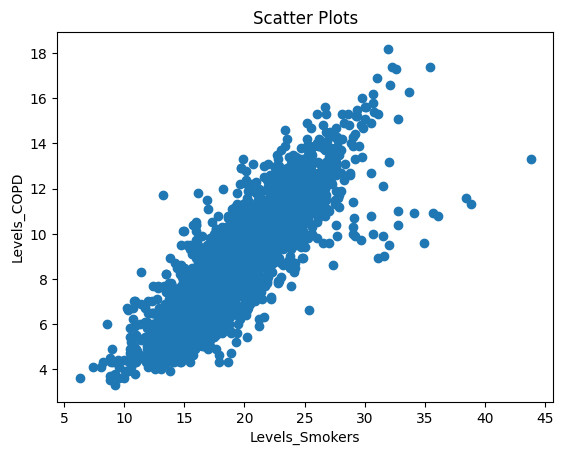

In [25]:
plt.title('Scatter Plots')
plt.xlabel('Levels_Smokers')
plt.ylabel('Levels_COPD')
plt.scatter(x, y)
plt.show()

In [18]:
# Step 3: Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.05)
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,  random_state=0)


In [19]:
# Create a OneHotEncoder instance
# enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
# encode_df = pd.DataFrame(enc.fit_transform(dataset[dataset_cat]))

# Add the encoded variable names to the dataframe
# encode_df.columns = enc.get_feature_names_out(dataset_cat)

# Set options to show all columns
# pd.options.display.max_columns = 50

# View the dataframe
# encode_df.head()

In [22]:
# Step 4: Training the Random Forest Regression model on the training set

# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train.reshape(-1,1), y_train.reshape(-1,1))

/var/folders/qg/6vjkgpvs7z1c7vhvhq3r44dr0000gn/T/ipykernel_78071/2817298025.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train.reshape(-1,1), y_train.reshape(-1,1))


RandomForestRegressor(n_estimators=10, random_state=0)

In [23]:
regressor.score(x_test, y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[31.1 30.7 17.7 16.1 21.  23.2 17.2 16.3 16.4 16.7 25.4 17.1 19.5 21.6
 18.1 18.4 13.5 16.3 20.9 13.6 24.6 21.  17.1 30.1 12.9 21.2 20.2 26.7
 13.3 15.3 15.5 20.8 18.1 18.8 13.7 18.9 19.7 16.9 19.8 20.2 23.2 12.7
 18.4 16.7 16.5 20.7 24.4 26.  26.4 22.9 15.2 21.9 17.6 28.  19.2 20.1
 17.2 15.6 21.9 23.  16.8 25.2 22.9 15.7 17.2 23.3 21.4 18.3 23.2 15.7
 17.9 21.4 22.7 11.7 21.9 18.2 23.6 21.1 17.4 15.6 19.9 13.8 26.9 20.2
 15.3 21.8 16.  20.6 19.3 20.5 18.3 20.1 20.8 15.7 27.  23.5 17.1 24.7
 21.5 14.8 21.7 24.2 14.1 23.3 25.3 20.5 19.6 25.3 22.3 25.5 21.2 23.4
 19.4 17.5 19.6 12.4 12.2 16.6 17.3 18.3 14.2 30.8 17.3 18.  19.6 16.5
 17.1 21.9 23.5 16.4 19.9 25.4 24.5 15.2 16.2 17.7 14.9 18.8 21.  26.4
 29.2 26.5 19.  18.1 22.5 19.6 18.9 20.4 15.9 26.1 21.6 20.9 22.5 21.2
 20.7 24.  21. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# Step 5: Predicting the Results
y_pred = regressor.predict(X_test.reshape(-1,1))
y_pred

In [1]:
# Step 6: Comparing the Real Values with Predicted Values
df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df

NameError: name 'pd' is not defined

In [ ]:
# # Visualising the Random Forest Regression Results  
# 
x_grid = np.arange(int(float(min(x))), int(float(max(x))), 0.01)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x_test, y_test, color = 'red')
plt.scatter(x_test, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Levels_Smokers')
plt.ylabel('Levels_COPD')
plt.show()

In [ ]:
plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('Random Forest Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

In [ ]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [ ]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [ ]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [ ]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [ ]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [ ]:
# Check the structure of the Sequential model
nn_model.summary()

In [ ]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

In [ ]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

In [ ]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")